<a href="https://colab.research.google.com/github/HansHenseler/masdav2024/blob/main/Part_9_Analysing_and_visualising_geolocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing and visualising geolocation data

Part 9

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2024

# Part 9

Importing libraries

In [1]:
# Need to install various packages.
#
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirment
!apt install python3-rtree
!pip install geopandas
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive

## 1 Reading Geographic data
Geographic data (Vector) comes in different formats (Shapefiles, Geopackage, Geojson ...etc). Loading most of Geodata Formats with Geopandas is straightforward.

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import folium
import plotly_express as px

In [3]:
# get demo data

!git clone --recursive https://github.com/shakasom/GDS.git

Cloning into 'GDS'...
remote: Enumerating objects: 39, done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39 (from 1)
Receiving objects: 100% (39/39), 8.77 MiB | 35.63 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [4]:
# We have zipped data so let us unzip it
!unzip GDS/dataset/1-introData.zip

Archive:  GDS/dataset/1-introData.zip
   creating: 1-introData/
  inflating: 1-introData/cities.geojson  
  inflating: 1-introData/countries.gpkg  
  inflating: 1-introData/rivers.gpkg  


In [5]:
# Read the data

# 1. Read Countries --> Geopackage Format
file = '1-introData/countries.gpkg'
countries = gpd.read_file(file)
countries.shape

(253, 11)

In [6]:
# so we have 253 countries. Here are the first 5:

countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [7]:
ch_country = countries.loc[countries['NAME']=='Switzerland']
ch_country

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe,"MULTIPOLYGON (((10.45381 46.86443, 10.44854 46..."


In [8]:
# 2. Read Cities --> Geojson Format

cities = gpd.read_file('1-introData/cities.geojson')

In [9]:
# Explore cities data
cities.shape

(7343, 9)

In [10]:
biel_city = cities.loc[cities['name']=='Biel']
biel_city

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
922,Biel,0.0,0,47.16659,7.250038,78708,48614,0,POINT (7.25004 47.16659)


## 2 Making maps

In [11]:
from geopandas.tools import sjoin

<Axes: >

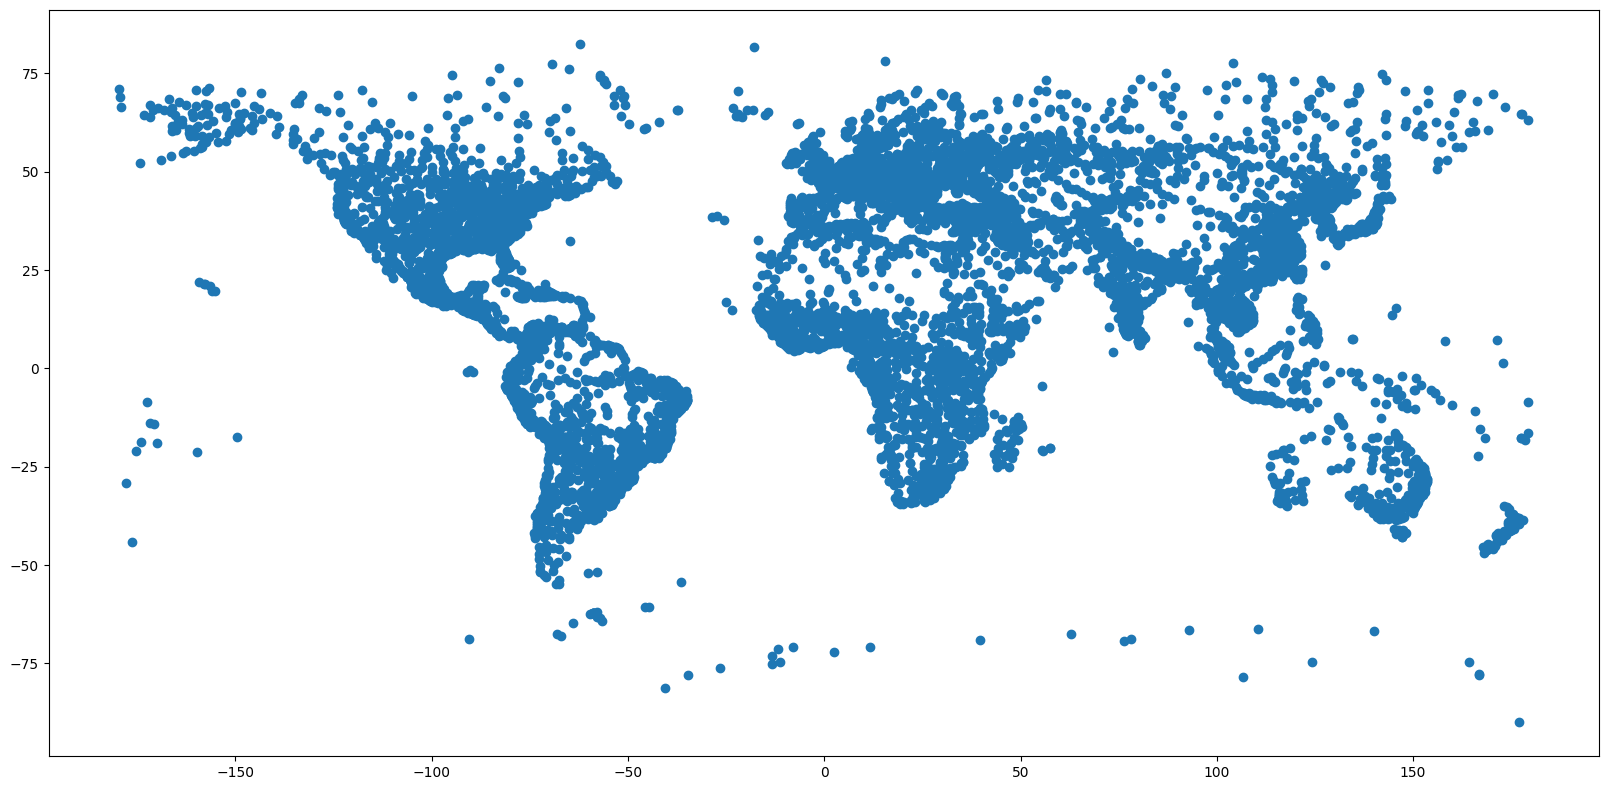

In [12]:
cities.plot(figsize=(20,20))

<Axes: >

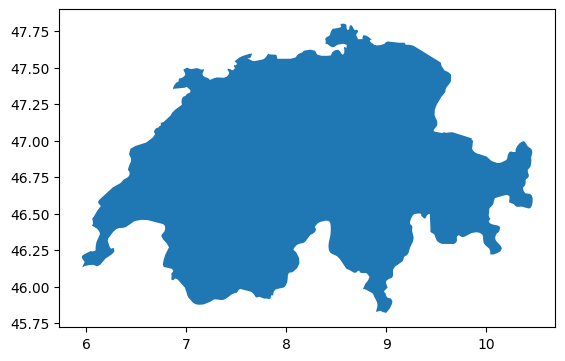

In [13]:
ch_country.plot()



In [14]:
# make cities coordinate reference system same as country crs

cities.crs = ch_country.crs

<Axes: >

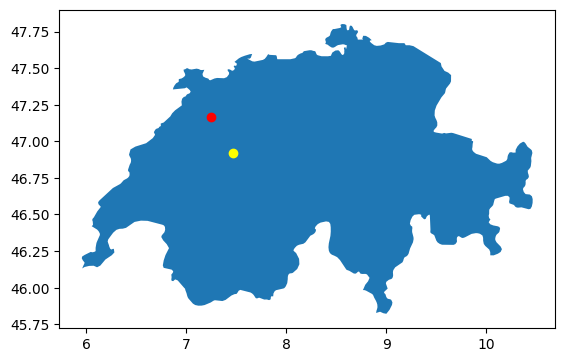

In [15]:
ax = ch_country.plot()
bern_city = cities.loc[cities['name']=='Bern']
biel_city.plot(ax=ax,color='red')
bern_city.plot(ax=ax,color='yellow')

## 3 Spatial join

In [16]:
# now join cities and ch_countries to get all cities in Switzerlands

ch_cities = sjoin(cities, ch_country, how="inner")
ch_cities.shape

(28, 20)

In [17]:
ch_cities.tail()

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry,index_right,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT
2549,Lausanne,0.0,0,46.530427,6.650023,265702,116751,250481,POINT (6.65002 46.53043),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe
2550,Basel,0.0,0,47.580389,7.590017,830000,170635,559750,POINT (7.59002 47.58039),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe
6493,Bern,0.0,0,46.916683,7.466975,275329,121631,267814,POINT (7.46698 46.91668),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe
7182,Zürich,1.0,1,47.379988,8.550010,1108000,341730,779877,POINT (8.54806 47.38193),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe
7286,Geneva,1.0,0,46.210008,6.140028,1240000,192385,508284,POINT (6.14003 46.21001),92,Switzerland,8236303,13,496300.0,2017,2010,2016,2. Developed region: nonG7,1. High income: OECD,Europe


<Axes: >

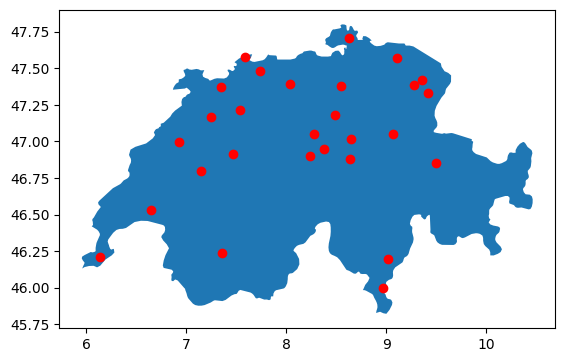

In [30]:
ax = ch_country.plot()
ch_cities.plot(ax=ax,color='red')

## 4 Plotting IP addresses

In [19]:
import socket
import requests
import json

def get_info(ip):
    """This function calls the api and return the response"""
    my_api_key= 'a5af1c0bc39b4df29321df364a2b71e8'
    url =f"https://api.ipgeolocation.io/ipgeo?apiKey={my_api_key}&ip={ip}"
    headers = {
        'accept': "application/json",
        'content-type': "application/json"
        }
    response = requests.request("GET", url, headers=headers)
    respond = json.loads(response.text)
    return respond

In [23]:
bfh = 'www.bfh.ch'
bfh_ip = socket.gethostbyname(bfh)
bfh_info = get_info(bfh_ip)
bfh_info

{'ip': '94.230.211.116',
 'continent_code': 'EU',
 'continent_name': 'Europe',
 'country_code2': 'CH',
 'country_code3': 'CHE',
 'country_name': 'Switzerland',
 'country_name_official': 'Swiss Confederation',
 'country_capital': 'Bern',
 'state_prov': 'Zurich',
 'state_code': 'CH-ZH',
 'district': '',
 'city': 'Zurich',
 'zipcode': '8001',
 'latitude': '47.37700',
 'longitude': '8.53977',
 'is_eu': False,
 'calling_code': '+41',
 'country_tld': '.ch',
 'languages': 'de-CH,fr-CH,it-CH,rm',
 'country_flag': 'https://ipgeolocation.io/static/flags/ch_64.png',
 'geoname_id': '6530239',
 'isp': 'Nine Internet Solutions AG, Switzerland',
 'connection_type': '',
 'organization': 'Nine Internet Solutions AG',
 'country_emoji': '🇨🇭',
 'currency': {'code': 'CHF', 'name': 'Swiss Franc', 'symbol': 'CHF'},
 'time_zone': {'name': 'Europe/Zurich',
  'offset': 1,
  'offset_with_dst': 2,
  'current_time': '2024-08-20 23:06:54.992+0200',
  'current_time_unix': 1724188014.992,
  'is_dst': True,
  'dst_sav

In [51]:
sbb = 'cityhotel-biel.ch'
sbb_info = get_info(socket.gethostbyname(sbb))
sbb_info

{'ip': '185.85.111.209',
 'continent_code': 'EU',
 'continent_name': 'Europe',
 'country_code2': 'CH',
 'country_code3': 'CHE',
 'country_name': 'Switzerland',
 'country_name_official': 'Swiss Confederation',
 'country_capital': 'Bern',
 'state_prov': 'Zurich',
 'state_code': 'CH-ZH',
 'district': '',
 'city': 'Dürnten',
 'zipcode': '8632',
 'latitude': '47.26066',
 'longitude': '8.85054',
 'is_eu': False,
 'calling_code': '+41',
 'country_tld': '.ch',
 'languages': 'de-CH,fr-CH,it-CH,rm',
 'country_flag': 'https://ipgeolocation.io/static/flags/ch_64.png',
 'geoname_id': '10394552',
 'isp': 'Firestorm3',
 'connection_type': '',
 'organization': 'Datasource AG',
 'country_emoji': '🇨🇭',
 'currency': {'code': 'CHF', 'name': 'Swiss Franc', 'symbol': 'CHF'},
 'time_zone': {'name': 'Europe/Zurich',
  'offset': 1,
  'offset_with_dst': 2,
  'current_time': '2024-08-20 23:21:30.961+0200',
  'current_time_unix': 1724188890.961,
  'is_dst': True,
  'dst_savings': 1,
  'dst_exists': True,
  'dst_s

In [53]:
elite = 'sbb.ch'
hotel_info = get_info(socket.gethostbyname(elite))
hotel_info

{'ip': '194.150.245.142',
 'continent_code': 'EU',
 'continent_name': 'Europe',
 'country_code2': 'CH',
 'country_code3': 'CHE',
 'country_name': 'Switzerland',
 'country_name_official': 'Swiss Confederation',
 'country_capital': 'Bern',
 'state_prov': 'Berne',
 'state_code': 'CH-BE',
 'district': '',
 'city': 'Berne',
 'zipcode': '3011',
 'latitude': '46.94785',
 'longitude': '7.44879',
 'is_eu': False,
 'calling_code': '+41',
 'country_tld': '.ch',
 'languages': 'de-CH,fr-CH,it-CH,rm',
 'country_flag': 'https://ipgeolocation.io/static/flags/ch_64.png',
 'geoname_id': '11789732',
 'isp': 'Schweizerische Bundesbahnen SBB',
 'connection_type': '',
 'organization': 'Schweizerische Bundesbahnen SBB',
 'country_emoji': '🇨🇭',
 'currency': {'code': 'CHF', 'name': 'Swiss Franc', 'symbol': 'CHF'},
 'time_zone': {'name': 'Europe/Zurich',
  'offset': 1,
  'offset_with_dst': 2,
  'current_time': '2024-08-20 23:22:33.220+0200',
  'current_time_unix': 1724188953.22,
  'is_dst': True,
  'dst_savings

In [54]:
# Convert this geolocation data into a geodataframe. First we make a dataframe

lst = { 'Hostname':[sbb,bfh,elite],
        'Latitude':[sbb_info['latitude'],bfh_info['latitude'],hotel_info['latitude']],
        'Longitude':[sbb_info['longitude'],bfh_info['longitude'],hotel_info['longitude']]}

# Calling DataFrame constructor on list
df = pd.DataFrame(lst)
df

,Hostname,Latitude,Longitude
0,cityhotel-biel.ch,47.26066,8.85054
1,www.bfh.ch,47.37700,8.53977
2,sbb.ch,46.94785,7.44879


In [55]:
# then we convert the dataframe into a GeoDataFrame

host_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
host_gdf.head()

,Hostname,Latitude,Longitude,geometry
0,cityhotel-biel.ch,47.26066,8.85054,POINT (8.85054 47.26066)
1,www.bfh.ch,47.37700,8.53977,POINT (8.53977 47.37700)
2,sbb.ch,46.94785,7.44879,POINT (7.44879 46.94785)


<Axes: >

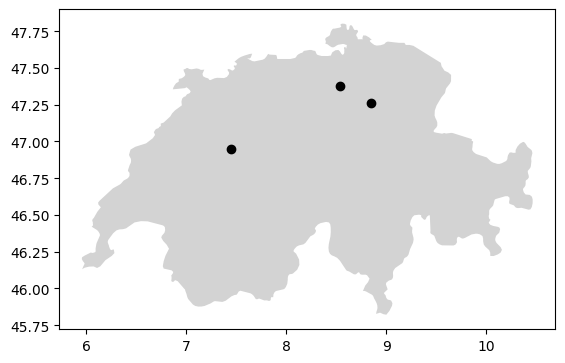

In [56]:
host_gdf.crs = ch_country.crs
bx = ch_country.plot(color='lightgrey')
host_gdf.plot(ax=bx,color='black')

## 5 Open streetmap

In [57]:
# folium maps combine geodataframaes and maps from, e.g., Openstreetmap
#
# here is an introduction : https://geopandas.readthedocs.io/en/latest/gallery/plotting_with_folium.html
#
map = folium.Map(location = [host_gdf.geometry[0].xy[1][0],host_gdf.geometry[0].xy[0][0]], tiles='OpenStreetMap' , width='75%',height='75%',zoom_start = 8)

# Create a geometry list from the GeoDataFrame
host_gdf_list = [[point.xy[1][0], point.xy[0][0]] for point in host_gdf.geometry ]

# Iterate through list and add a marker for each host in host_gdf
i = 0
for coordinates in host_gdf_list:
    map.add_child(folium.Marker(location = coordinates,popup=host_gdf.Hostname[i]))
    i = i + 1

map

## 6 Extracting geolocation from pictures

In [58]:
import PIL.Image

from google.colab import drive
drive.mount('/content/gdrive')

picture = '/content/gdrive/MyDrive/Testdata/20200701_114126_small.jpg'
img = PIL.Image.open(picture)
exif_data = img._getexif()
exif_data

Mounted at /content/gdrive


{34853: {0: b'\x02\x02\x00\x00',
  1: 'N',
  2: (47.0, 20.0, 16.0),
  3: 'E',
  4: (11.0, 50.0, 8.0),
  5: b'\x00',
  6: 761.0,
  7: (9.0, 41.0, 10.0),
  29: '2020:07:01'},
 296: 2,
 34665: 214,
 271: 'samsung',
 272: 'SM-G955F',
 305: 'G955FXXS9DTEA',
 274: 1,
 306: '2020:07:01 11:41:26',
 531: 1,
 282: 72.0,
 283: 72.0,
 36864: b'0220',
 37121: b'\x01\x02\x03\x00',
 37377: 9.55,
 36867: '2020:07:01 11:41:26',
 36868: '2020:07:01 11:41:26',
 37378: 1.53,
 37379: 7.28,
 37380: 0.0,
 37381: 1.53,
 37383: 2,
 37385: 0,
 37386: 4.2,
 37510: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 40961: 1,
 40962: 4032,
 41990: 0,
 37520: '0067',
 37521: '0067',
 37522: '0067',
 40963: 1960,
 33434: 0.0013333333333333333,
 40965: 898,
 33437: 1.7,
 41729: b'\x01\x00\x00\x00',
 59933: -54,
 42016: 'F12LLJA00SM F12LLKL01GM\n',
 34850: 2,
 34855: 40,
 41986: 0,
 40960: b'0100',
 41987: 0,
 41988: nan,
 41989: 26,
 41992: 0,
 41993: 0,
 41994: 0,
 37500: b'\x07\x00\x01\x00\x07\x00\x04\x00\x0

In [59]:
!sudo apt-get install -y exiftool

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libimage-exiftool-perl' instead of 'exiftool'
The following additional packages will be installed:
  libarchive-zip-perl libmime-charset-perl libsombok3
  libunicode-linebreak-perl
Suggested packages:
  libposix-strptime-perl libencode-hanextra-perl libpod2-base-perl
The following NEW packages will be installed:
  libarchive-zip-perl libimage-exiftool-perl libmime-charset-perl libsombok3
  libunicode-linebreak-perl
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 3,964 kB of archives.
After this operation, 23.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-zip-perl all 1.68-1 [90.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libimage-exiftool-perl all 12.40+dfsg-1 [3,717 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmime-charset-perl all 1.012.2

In [60]:
!exiftool -c '%.6f' -GPSPosition $picture

GPS Position                    : 47.337778 N, 11.835556 E


In [61]:
import base64
#map = folium.Map(location = [47.337778,11.835556], tiles='OpenStreetMap' , width='75%',height='75%',zoom_start = 8)

encoded = base64.b64encode(open(picture, 'rb').read()).decode()

html = '<img src="data:image/jpeg;base64,{}">'.format

iframe = folium.IFrame(html(encoded), width=500, height=253)

popup = folium.Popup(iframe, max_width=2650)

map.add_child(folium.Marker(location = [47.337778,11.835556],popup=popup))
#map

## 7 Rendering Google timeline locations on OpenStreatMap

I have downloaded my Google timeline via Google takeout. This gives a records.json file. I have extracted the locations from this json file including the following information:
```
datetime,latitude,longitude,most_likely_activity,source,accuracy

```
I've sampled locations so that consecutive locations are 100 meters apart. The python script was written with the help of ChatGPT and is as follows in case you want to try this on your own Google timeline data:

```python
import json
import csv
import math

# Read the JSON file
with open('records.json', 'r') as json_file:
    data = json.load(json_file)

# Function to calculate distance between two points using Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Earth's radius in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    a = math.sin(delta_phi / 2.0)**2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    distance = R * c
    return distance

# Open a CSV file for writing
with open('output.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    
    # Write the header row
    csv_writer.writerow(['datetime', 'latitude', 'longitude', 'most_likely_activity', 'source'])
    
    prev_location = None
    
    # Loop through the location entries
    for location in data['locations']:
        timestamp = location.get('timestamp')
        
        # Check if the timestamp matches the desired date
        if timestamp and timestamp.startswith('2023-08-22'):
            latitude = location.get('latitudeE7', '') / 1e7 if 'latitudeE7' in location else ''
            longitude = location.get('longitudeE7', '') / 1e7 if 'longitudeE7' in location else ''
            activity = ''
            source = location.get('source', '')
            
            # Check if activity data is available
            if 'activity' in location:
                most_likely_activity = max(location['activity'][0]['activity'], key=lambda x: x['confidence'])
                activity = most_likely_activity['type']
            
            # Convert the timestamp format
            timestamp = timestamp.replace('T', ' ').replace('Z', '')
            
            # If there's a previous location, calculate distance and filter
            if prev_location:
                distance = haversine_distance(prev_location['latitudeE7'] / 1e7, prev_location['longitudeE7'] / 1e7,
                                               latitude, longitude)
                if distance < 100:
                    continue  # Skip this location if it's too close to the previous one
            
            # Write the row to the CSV file
            csv_writer.writerow([timestamp, latitude, longitude, activity, source])
            
            # Update the previous location
            prev_location = location
```

This script uses the Haversine formula to calculate the distance between two points on the Earth's surface using their latitude and longitude values. Make sure to replace `'records.json'` with the actual path to your JSON file.

We'll continue with the csv file I created with this script and that is in the Testdata folder on your Google Drive:

In [63]:
my_locations = "/content/gdrive/MyDrive/Testdata/my_locations_in_biel_20230822.csv"
!head $my_locations

datetime,latitude,longitude,most_likely_activity,source,accuracy
2023-08-22 04:26:04.047,47.1343451,7.2442484,,WIFI,18
2023-08-22 05:44:10.112,47.1360852,7.2446098,UNKNOWN,CELL,899
2023-08-22 05:44:41.675,47.1343231,7.2442374,,WIFI,92
2023-08-22 05:50:48.862,47.1335067,7.2436153,,GPS,62
2023-08-22 06:08:42.976,47.1335605,7.2458057,ON_FOOT,CELL,1299
2023-08-22 06:18:44.038,47.1291339,7.2432057,ON_FOOT,CELL,1299
2023-08-22 06:19:22.116,47.130615,7.2406835,,WIFI,13
2023-08-22 06:20:44.111,47.1291339,7.2432057,UNKNOWN,CELL,1299
2023-08-22 06:22:44.205,47.130615,7.2406835,,WIFI,317


In [64]:
# Read the CSV file into a Pandas DataFrame
#
df = pd.read_csv(my_locations)

# Create a map centered at the mean of latitudes and longitudes
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=15)

# Function to set marker color based on accuracy
def get_marker_color(accuracy):
    if accuracy < 50:
        return 'darkblue'
    elif accuracy < 100:
        return 'blue'
    else:
        return 'lightblue'

# Function to generate Google Maps link
def generate_google_maps_link(latitude, longitude):
    formatted_latitude = f"{latitude:.7f}"
    formatted_longitude = f"{longitude:.7f}"
    return f"https://www.google.nl/maps/place/{formatted_latitude}N+{formatted_longitude}E"

# Loop through the DataFrame rows and add markers to the map
for index, row in df.iterrows():
    marker_color = get_marker_color(row['accuracy'])

    popup_html = (
        f"<div><b>Date Time:</b> {row['datetime']}</div>"
        f"<div><b>Source:</b> {row['source']}</div>"
        f"<div><b>Activity:</b> {row['most_likely_activity']}</div>"
        f"<div><b>Latitude:</b> {row['latitude']}</div>"
        f"<div><b>Longitude:</b> {row['longitude']}</div>"
        f"<div><a href='{generate_google_maps_link(row['latitude'], row['longitude'])}' target='_blank'>Google Maps</a></div>"
    )

    popup = folium.Html(popup_html, script=True)
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup, parse_html=True),
        icon=folium.Icon(color=marker_color)
    ).add_to(m)

# Display the map
m


# Exercises

## 1 Analyse pictures from an Android 10 phone for geotags and plot on a map

In [ ]:
# Download Android_10.zip from Digital Corpora (takes app 7 minutes to download in Google Colab)
#
!wget "https://digitalcorpora.s3.amazonaws.com/corpora/mobile/android_10/Android_10.zip"

--2021-08-26 23:39:28--  https://digitalcorpora.s3.amazonaws.com/corpora/mobile/android_10/Android_10.zip
Resolving digitalcorpora.s3.amazonaws.com (digitalcorpora.s3.amazonaws.com)... 52.218.138.83
Connecting to digitalcorpora.s3.amazonaws.com (digitalcorpora.s3.amazonaws.com)|52.218.138.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10476724716 (9.8G) [application/zip]
Saving to: ‘Android_10.zip’

Android_10.zip      100%[===================>]   9.76G  23.5MB/s    in 6m 40s  

2021-08-26 23:46:08 (25.0 MB/s) - ‘Android_10.zip’ saved [10476724716/10476724716]



In [ ]:
# In this zip there is a zip file containing a logical extraction of the file system
# /Android 10 Image with Documentation/Non-Cellebrite Extraction/Pixel 3.zip
# extract this zip file

!unzip Android_10.zip  Android\ 10\ Image\ with\ Documentation/Non-Cellebrite\ Extraction/Pixel\ 3.zip

Archive:  Android_10.zip
  inflating: Android 10 Image with Documentation/Non-Cellebrite Extraction/Pixel 3.zip  


In [ ]:
# investigate the contents of this zip file for jpg files, extract, run the exiftool and plot on a map
# hint: use the unzip -l option

!unzip -l "/content/Android 10 Image with Documentation/Non-Cellebrite Extraction/Pixel 3.zip"

In [ ]:
# Your answer

## 2 Can you find any other sources besides jpg files that contain geo location and can you also extract  and visualise that information?

hint: consider sqlite files from Android apps

In [ ]:
# Your answer

## 3 Cell tower visualisation

### 3a Download UMTS cell tower information from Swisscom and filter locations in Biel and store in new csv in your notebook

In [ ]:
# hint: you can download a csv file with UMTS cell tower locations here https://opendata.swisscom.com/explore/dataset/xy_pwr_umts_170101/table/?disjunctive.powercode_eng

# Coordinates of Biel/Bienne city center
biel_center = (47.1371, 7.2467)

# Function to calculate distance between two coordinates
from geopy.distance import geodesic
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Your answer

### 3b Visualise the cell towers using Folium. Use the powercode column as a measure for the radius for a circle with the center at the cell tower location(make sensible assumptions on scale)

In [ ]:
# Your answer

### 3c Combine this view with the view presented in example 7 showing locations that were visited in Biel

In [ ]:
# Your answer